# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive')

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)


In [5]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [6]:
data[0]

array([array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [9]:
X_train.shape

(409, 224, 224, 3)

In [10]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  ...
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]]

 [[-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  ...
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]]

 [[-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  [-0.95294118 -0.67058825 -0.56078434]
  ...
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]
  [-0.92941177 -0.63137257 -0.52941179]]

 ...

 [[-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  ...
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]
  [-0.99215686 -0.99215686 -0.99215686]]

 [

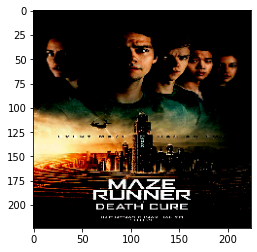

In [11]:
from matplotlib import pyplot
n = 11
print(X_train[n])
pyplot.imshow(X_train[n])

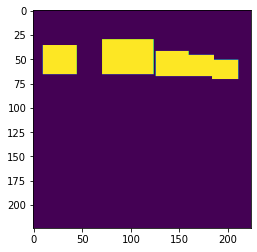

In [12]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(include_top=False,input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,3), alpha=1.0,weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer(model.layers[0].name).output
    block1 = model.get_layer("conv_pw_1_relu").output
    block2 = model.get_layer("conv_pw_3_relu").output
    block3 = model.get_layer("conv_pw_5_relu").output
    block4 = model.get_layer("conv_pw_11_relu").output
    block5 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block5), block4])
    x = Concatenate()([UpSampling2D()(x), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])


    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)
    

### Call the create_model function

In [14]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())


### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
#### Add your code here ####
model.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])


### Define checkpoint and earlystopping

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [19]:
#### Add your code here ####
model.fit(          X_train,
                    masks,
                    epochs=10,
                    batch_size = 1,
                    callbacks=[checkpoint, reduce_lr, stop],
                    verbose=1)


Epoch 1/10
409/409 [==============================] - ETA: 0s - loss: 1.2220 - dice_coefficient: 0.5052
Epoch 00001: loss improved from inf to 1.22196, saving model to model-1.22.h5
409/409 [==============================] - 37s 91ms/step - loss: 1.2220 - dice_coefficient: 0.5052 - lr: 0.0010
Epoch 2/10
409/409 [==============================] - ETA: 0s - loss: 0.8521 - dice_coefficient: 0.6008
Epoch 00002: loss improved from 1.22196 to 0.85208, saving model to model-0.85.h5
409/409 [==============================] - 37s 91ms/step - loss: 0.8521 - dice_coefficient: 0.6008 - lr: 0.0010
Epoch 3/10
409/409 [==============================] - ETA: 0s - loss: 0.7534 - dice_coefficient: 0.6356
Epoch 00003: loss improved from 0.85208 to 0.75344, saving model to model-0.75.h5
409/409 [==============================] - 37s 91ms/step - loss: 0.7534 - dice_coefficient: 0.6356 - lr: 0.0010
Epoch 4/10
409/409 [==============================] - ETA: 0s - loss: 0.6592 - dice_coefficient: 0.6716
Epoch 

### Get the predicted mask for a sample image   (3 marks)

In [0]:
n = 11
sample_image = X_train[n]
actual_mask = masks[n]
predicted_mask = model.predict(np.reshape(X_train[11],(1,IMAGE_WIDTH,IMAGE_HEIGHT,3)))


In [21]:
print(actual_mask)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
print(predicted_mask)

[[[1.48940913e-07 1.48940913e-07 8.22168289e-08 ... 3.48852538e-08
   5.03066708e-08 5.03066708e-08]
  [1.48940913e-07 1.48940913e-07 8.22168289e-08 ... 3.48852538e-08
   5.03066708e-08 5.03066708e-08]
  [1.14655506e-07 1.14655506e-07 1.00824515e-07 ... 4.07816430e-08
   2.78923160e-08 2.78923160e-08]
  ...
  [7.10016366e-07 7.10016366e-07 1.42192278e-06 ... 1.34363276e-07
   6.32657233e-08 6.32657233e-08]
  [6.70328632e-07 6.64518041e-07 6.08223274e-07 ... 5.71333771e-08
   6.52991474e-08 6.52991474e-08]
  [6.65482673e-07 6.67416657e-07 5.47890636e-07 ... 5.12424556e-08
   6.52991474e-08 6.52991474e-08]]]


In [23]:
sample_image.shape

(224, 224, 3)

In [24]:
actual_mask.shape

(224, 224)

In [25]:
predicted_mask.shape

(1, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


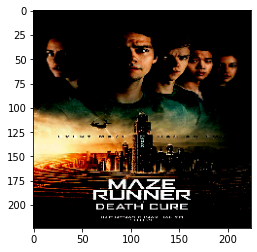

In [26]:
pyplot.imshow(sample_image)

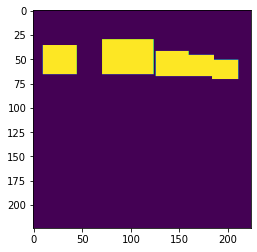

In [27]:
pyplot.imshow(actual_mask)

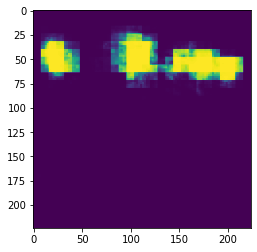

In [28]:
pyplot.imshow(np.reshape(predicted_mask,(224,224)))

### Impose the mask on the image (3 marks)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


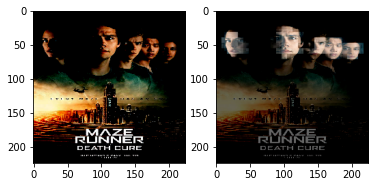

In [34]:
alpha = .6
out = sample_image * (1.0 - alpha) + np.reshape(predicted_mask,(224,224,1)) * alpha

pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(sample_image)
pyplot.subplot(1,2,2)
pyplot.imshow(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


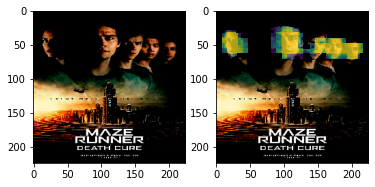

In [36]:
Predicted_mask_reshaped = np.reshape(predicted_mask,(224,224))
masked = np.ma.masked_where(Predicted_mask_reshaped < 0.1, Predicted_mask_reshaped)

pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(sample_image)
pyplot.subplot(1,2,2)
pyplot.imshow(sample_image)
pyplot.imshow(masked, alpha=0.7)
pyplot.show()

In [0]:
#np.save('sample_image', sample_image)

In [0]:
#np.save('actual_mask', actual_mask)

In [0]:
#np.save('predicted_mask', predicted_mask)

In [0]:

#import numpy as np
#sample_image = np.load('sample_image.npy')
#actual_mask = np.load('actual_mask.npy')
#predicted_mask = np.load('predicted_mask.npy')